In [1]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
pd.options.display.max_columns = 50
pd.options.display.max_rows = 500
pd.set_option('display.max_colwidth', -1)

## Load data

In [2]:
# pass11_df = pd.read_excel('./data/รายชื่อผู้ผ่านรอบ1-1.xlsx')
# pass12_df = pd.read_excel('./data/รายชื่อผู้ผ่านรอบ1-2.xlsx')
# pass2_df = pd.read_excel('./data/รายชื่อผู้ผ่านรอบ2.xlsx')
# pass31_df = pd.read_excel('./data/รายชื่อผู้ผ่านรอบ3-1.xlsx')
# pass32_df = pd.read_excel('./data/รายชื่อผู้ผ่านรอบ3-2.xlsx')
# pass35_df = pd.read_excel('./data/รายชื่อผู้ผ่านรอบ3.5.xlsx')

pass11_df = pickle.load(open("pass11_df.p", "rb"))
pass12_df = pickle.load(open("pass12_df.p", "rb"))
pass2_df = pickle.load(open("pass2_df.p", "rb"))
pass31_df = pickle.load(open("pass31_df.p", "rb"))
pass32_df = pickle.load(open("pass32_df.p", "rb"))
pass35_df = pickle.load(open("pass35_df.p", "rb"))

## รอบ 1/1

In [3]:
main_df = pass11_df
num_regis = 134859
output = "มีผู้สมัคร " + str(num_regis) + " คน" + "\n"
output += "มีผู้สอบติด " + str(len(main_df['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(main_df)) + "\n"
deny_or_ignore = main_df[main_df['สถานะ'] != '1']
confirm = main_df[main_df['สถานะ'] == '1']
output += "มีผู้สละสิทธิ์ " + str(len(deny_or_ignore['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(deny_or_ignore)) + "\n"
output += "มีผู้ยืนยันสิทธิ์ " + str(len(confirm['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(confirm))
print(output)

มีผู้สมัคร 134859 คน
มีผู้สอบติด 51745 คน เป็นที่นั่งทั้งหมด 59140
มีผู้สละสิทธิ์ 18840 คน เป็นที่นั่งทั้งหมด 21140
มีผู้ยืนยันสิทธิ์ 37998 คน เป็นที่นั่งทั้งหมด 38000


### Q: จำนวนคนที่ confirm, deny, next เป็นยังไง?

In [4]:
status = main_df.groupby('เลข ปปช')['สถานะ'].value_counts().unstack().fillna(0)
status['sum'] = status.sum(axis=1)
status['drop'] = status[['0', 'X']].sum(axis=1)
status = status.reset_index()
status.head()

สถานะ        เลข ปปช    0    1    X  sum  drop
0      0050051218062  0.0  1.0  0.0  1.0  0.0 
1      0050091060320  0.0  0.0  1.0  1.0  1.0 
2      0050091129222  0.0  1.0  0.0  1.0  0.0 
3      0050091386012  0.0  1.0  0.0  1.0  0.0 
4      0050091422132  0.0  1.0  0.0  1.0  0.0

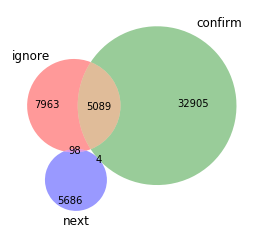

In [5]:
set0 = set(status[status['0'] > 0]['เลข ปปช'])
set1 = set(status[status['1'] > 0]['เลข ปปช'])
setX = set(status[status['X'] > 0]['เลข ปปช'])

venn3([set0, set1, setX], ('ignore', 'confirm', 'next'))
plt.show()

### Q: โดยเฉลี่ยแล้วคนนึงติดกี่ที่?

In [6]:
status['sum'].describe().to_frame()

sum
count  51745.000000
mean   1.142912    
std    0.418629    
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    1.000000    
max    7.000000

In [7]:
status.groupby('sum')['เลข ปปช'].count().to_frame()

เลข ปปช
sum         
1.0  45465  
2.0  5369   
3.0  744    
4.0  138    
5.0  22     
6.0  6      
7.0  1

### Q: โดยเฉลี่ยแล้วคนนึงสละสิทธิ์กี่ที่?

In [8]:
status['drop'].describe().to_frame()

drop
count  51745.000000
mean   0.408542    
std    0.589071    
min    0.000000    
25%    0.000000    
50%    0.000000    
75%    1.000000    
max    6.000000

In [9]:
status.groupby('drop')['เลข ปปช'].count().to_frame()

เลข ปปช
drop         
0.0   32905  
1.0   16886  
2.0   1672   
3.0   231    
4.0   41     
5.0   7      
6.0   3

### Q: คณะไหนมีคนสละสิทธิ์มากที่สุด

In [10]:
dept_dir = main_df.drop_duplicates('รหัสคณะ')[['รหัสคณะ','ชื่อคณะ/สาขา','มหาวิทยาลัย']]
dept_status = main_df.groupby('รหัสคณะ')['สถานะ'].value_counts().unstack().fillna(0)
dept_status['seat'] = dept_status.sum(axis=1)
dept_status['drop'] = dept_status[['0', 'X']].sum(axis=1)
dept_status["drop ratio"] = dept_status["drop"]/dept_status["seat"]
dept_status = dept_status.reset_index()
dept_status.head()

สถานะ      รหัสคณะ    0     1    X  seat  drop  drop ratio
0      00121010001  0.0  2.0   0.0  2.0   0.0   0.000000  
1      00121020102  4.0  25.0  1.0  30.0  5.0   0.166667  
2      00121030001  2.0  8.0   0.0  10.0  2.0   0.200000  
3      00121030102  1.0  17.0  2.0  20.0  3.0   0.150000  
4      00121040001  2.0  32.0  1.0  35.0  3.0   0.085714

In [11]:
dept_status[['1', 'drop', 'seat', 'drop ratio', 'รหัสคณะ']].merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).rename(index=str, columns={'1': 'accept'})

accept    drop    seat  drop ratio      รหัสคณะ  \
1328  631.0   1177.0  1808.0  0.650996    01707010024   
249   107.0   118.0   225.0   0.524444    00224292381   
3146  118.0   117.0   235.0   0.497872    16603830211   
1314  58.0    110.0   168.0   0.654762    01703010001   
1055  84.0    106.0   190.0   0.557895    01300000018   
1351  9.0     105.0   114.0   0.921053    01710010001   
1298  56.0    95.0    151.0   0.629139    01702010005   
254   45.0    88.0    133.0   0.661654    00224292431   
2858  68.0    87.0    155.0   0.561290    15661000101   
1048  118.0   82.0    200.0   0.410000    01300000009   
1316  22.0    79.0    101.0   0.782178    01703010003   
1315  52.0    79.0    131.0   0.603053    01703010002   
256   42.0    77.0    119.0   0.647059    00224302451   
2820  68.0    73.0    141.0   0.517730    15630000201   
1297  28.0    72.0    100.0   0.720000    01702010002   
242   57.0    69.0    126.0   0.547619    00224282311   
251   45.0    67.0    112.0   0.598214    00224292401   
825   158.0   66.0    224.0   0.294643    01090110101   
1905  127.0   65.0    192.0   0.338542    02200800163   
3193  92.0    63.0    155.0   0.406452    16611344211   
2278  67.0    62.0    129.0   0.480620    14442054901   
252   27.0    60.0    87.0    0.689655    00224292411   
239   70.0    60.0    130.0   0.461538    00224282291   
240   55.0    60.0    115.0   0.521739    00224282301   
2844  50.0    58.0    108.0   0.537037    15640002001   
1052  44.0    58.0    102.0   0.568627    01300000015   
255   21.0    58.0    79.0    0.734177    00224292441   
3137  106.0   58.0    164.0   0.353659    16603332911   
609   72.0    57.0    129.0   0.441860    00522002020   
1053  44.0    57.0    101.0   0.564356    01300000016   
3424  41.0    56.0    97.0    0.577320    17111070602   
3746  148.0   55.0    203.0   0.270936    19104000023   
237   40.0    55.0    95.0    0.578947    00224272271   
3401  51.0    54.0    105.0   0.514286    17111040441   
1068  52.0    54.0    106.0   0.509434    01300000031   
3427  37.0    53.0    90.0    0.588889    17111090502   
1801  100.0   52.0    152.0   0.342105    02110010101   
3140  81.0    51.0    132.0   0.386364    16603731311   
2275  44.0    50.0    94.0    0.531915    14442044914   
1293  10.0    50.0    60.0    0.833333    01701010001   
2257  66.0    50.0    116.0   0.431034    14422034818   
1041  109.0   49.0    158.0   0.310127    01300000002   
1848  108.0   48.0    156.0   0.307692    02120010101   
1212  184.0   47.0    231.0   0.203463    01501410301   
2798  11.0    47.0    58.0    0.810345    15620000201   
3155  79.0    45.0    124.0   0.362903    16604344911   
2655  13.0    44.0    57.0    0.771930    15312000009   
258   20.0    44.0    64.0    0.687500    00224302461   
3188  85.0    44.0    129.0   0.341085    16609345111   
2233  42.0    43.0    85.0    0.505882    14412015280   
3395  38.0    43.0    81.0    0.530864    17111030333   
3154  34.0    43.0    77.0    0.558442    16604344011   
1066  44.0    43.0    87.0    0.494253    01300000029   
3388  55.0    42.0    97.0    0.432990    17111030301   
1067  38.0    42.0    80.0    0.525000    01300000030   
2271  32.0    42.0    74.0    0.567568    14432104732   
2697  22.0    42.0    64.0    0.656250    15318000001   
2259  59.0    42.0    101.0   0.415842    14422064061   
247   23.0    42.0    65.0    0.646154    00224282351   
3385  26.0    42.0    68.0    0.617647    17111010268   
3139  41.0    41.0    82.0    0.500000    16603731211   
1054  50.0    41.0    91.0    0.450549    01300000017   
3730  79.0    40.0    119.0   0.336134    19101000004   
3399  9.0     40.0    49.0    0.816327    17111030921   
3398  19.0    39.0    58.0    0.672414    17111030364   
3179  51.0    39.0    90.0    0.433333    16608732111   
232   32.0    39.0    71.0    0.549296    00224272221   
1259  41.0    39.0    80.0    0.487500    01605000044   
1218  102.0   38.0    140.0   0.271429    01601000002   
2792  19.0    38

### Q: คนติดคณะไหนที่สละสิทธิ์มากที่สุด

In [12]:
confirm = main_df[main_df['สถานะ'] == '1'].drop_duplicates('เลข ปปช')[['เลข ปปช', 'รหัสคณะ']]
drop_cont = status.merge(confirm, on='เลข ปปช').groupby('รหัสคณะ')[['sum','drop']].sum()
tmp = drop_cont.reset_index().merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).merge(dept_status[['รหัสคณะ', 'seat', '1', 'drop']], on='รหัสคณะ').rename(index=str, columns={'1': 'accept', 'sum': 'seat_aquire', 'drop_x': 'seat_drop', 'drop_y': 'drop'})
tmp['aquire_ratio'] = tmp['seat_aquire']/tmp['accept']
tmp['drop_ratio'] = tmp['seat_drop']/tmp['accept']
tmp

รหัสคณะ  seat_aquire  seat_drop  \
0     01707010024  741.0        110.0       
1     01800001074  228.0        43.0        
2     01601000002  144.0        42.0        
3     19104000023  180.0        32.0        
4     02120010101  139.0        31.0        
5     19106000051  159.0        29.0        
6     15318000001  50.0         28.0        
7     02110010101  126.0        26.0        
8     02333330101  99.0         24.0        
9     17111030302  62.0         24.0        
10    01601000005  79.0         24.0        
11    01300000009  142.0        24.0        
12    01090110101  181.0        23.0        
13    01800001076  96.0         23.0        
14    19105000037  76.0         23.0        
15    02200800163  150.0        23.0        
16    01407121001  56.0         22.0        
17    17111070602  61.0         20.0        
18    01601000001  61.0         20.0        
19    01800001110  129.0        19.0        
20    01604000039  81.0         19.0        
21    17111030301  74.0         19.0        
22    17111090502  55.0         18.0        
23    00522002020  90.0         18.0        
24    01501410301  201.0        17.0        
25    00201151441  45.0         17.0        
26    17111040441  68.0         17.0        
27    01407051009  48.0         17.0        
28    16601111111  59.0         16.0        
29    01800001098  80.0         16.0        
30    01501410201  86.0         16.0        
31    01300000018  100.0        16.0        
32    16604344911  94.0         15.0        
33    16601110911  51.0         15.0        
34    01703010002  67.0         15.0        
35    01601000009  43.0         15.0        
36    00605010101  37.0         15.0        
37    17111010268  41.0         15.0        
38    17001010004  83.0         15.0        
39    01413001301  75.0         15.0        
40    01300000002  124.0        15.0        
41    16604342311  69.0         15.0        
42    01604000040  59.0         15.0        
43    16603830211  133.0        15.0        
44    01601000012  42.0         14.0        
45    01800001058  35.0         14.0        
46    15312000009  27.0         14.0        
47    01609000061  33.0         14.0        
48    17111090205  44.0         14.0        
49    01601000008  63.0         14.0        
50    16601111011  49.0         14.0        
51    00971001181  51.0         14.0        
52    00613080101  41.0         13.0        
53    19105000044  82.0         13.0        
54    17111030333  51.0         13.0        
55    00504012010  36.0         13.0        
56    01603000037  41.0         13.0        
57    00512052020  146.0        13.0        
58    00909003181  58.0         13.0        
59    01800001069  64.0         13.0        
60    02334340101  61.0         13.0        
61    01090111101  62.0         13.0        
62    17111010249  38.0         12.0        
63    01434001650  62.0         12.0        
64    17651031891  46.0         12.0        
65    16609345111  97.0         12.0        
66    17111080521  32.0         12.0        
67    02115020201  60.0         12.0        
68    00122050102  72.0         12.0        
69    17111050201  40.0         12.0        
70    00304990217  119.0        12.0        
71    01707080005  36.0         12.0        
72    01610000062  74.0         12.0        
73    00512062020  107.0        11.0        
74    17111040722  27.0         11.0        
75    15311000007  23.0         11.0        
76    16601111411  48.0         11.0        
77    01601000007  32.0         11.0        
78    02200100836  31.0         11.0        
79    16608733911  93.0         11.0        
80    15312000008  16.0         11.0        
81    02412050011  126.0        11.0        
82    17111010284  24.0         11.0        
83    16603731511  51.0         11.0        
84    14412015200  72.0         11.0        
85    16603731311  92.0         11.0        
86    15313000006  18.0         11.0        
87    14442044914  55.0         11.0        
88   

## รอบ 1-2

In [13]:
main_df = pass12_df
num_regis = 64828
output = "มีผู้สมัคร " + str(num_regis) + " คน" + "\n"
output += "มีผู้สอบติด " + str(len(main_df['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(main_df)) + "\n"
deny_or_ignore = main_df[main_df['สถานะ'] != '1']
confirm = main_df[main_df['สถานะ'] == '1']
output += "มีผู้สละสิทธิ์ " + str(len(deny_or_ignore['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(deny_or_ignore)) + "\n"
output += "มีผู้ยืนยันสิทธิ์ " + str(len(confirm['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(confirm))
print(output)

มีผู้สมัคร 64828 คน
มีผู้สอบติด 33221 คน เป็นที่นั่งทั้งหมด 35997
มีผู้สละสิทธิ์ 10404 คน เป็นที่นั่งทั้งหมด 11283
มีผู้ยืนยันสิทธิ์ 24714 คน เป็นที่นั่งทั้งหมด 24714


### Q: จำนวนคนที่ confirm, deny, next เป็นยังไง?

In [14]:
status = main_df.groupby('เลข ปปช')['สถานะ'].value_counts().unstack().fillna(0)
status['sum'] = status.sum(axis=1)
status['drop'] = status[['0', 'X']].sum(axis=1)
status = status.reset_index()
status.head()

สถานะ        เลข ปปช    0    1    X  sum  drop
0      0020101012926  1.0  0.0  0.0  1.0  1.0 
1      0023011044643  0.0  1.0  0.0  1.0  0.0 
2      0063071137745  1.0  0.0  0.0  1.0  1.0 
3      0071081008300  0.0  1.0  0.0  1.0  0.0 
4      0071081023902  0.0  1.0  0.0  1.0  0.0

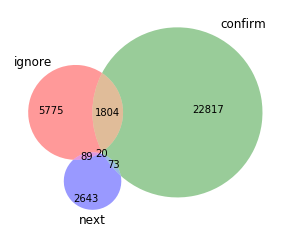

In [15]:
set0 = set(status[status['0'] > 0]['เลข ปปช'])
set1 = set(status[status['1'] > 0]['เลข ปปช'])
setX = set(status[status['X'] > 0]['เลข ปปช'])

venn3([set0, set1, setX], ('ignore', 'confirm', 'next'))
plt.show()

### Q: โดยเฉลี่ยแล้วคนนึงติดกี่ที่?

In [16]:
status['sum'].describe().to_frame()

sum
count  33221.000000
mean   1.083562    
std    0.335804    
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    1.000000    
max    6.000000

In [17]:
status.groupby('sum')['เลข ปปช'].count().to_frame()

เลข ปปช
sum         
1.0  30915  
2.0  1952   
3.0  252    
4.0  89     
5.0  12     
6.0  1

### Q: โดยเฉลี่ยแล้วคนนึงสละสิทธิ์กี่ที่?

In [18]:
status['drop'].describe().to_frame()

drop
count  33221.000000
mean   0.339635    
std    0.536700    
min    0.000000    
25%    0.000000    
50%    0.000000    
75%    1.000000    
max    5.000000

In [19]:
status.groupby('drop')['เลข ปปช'].count().to_frame()

เลข ปปช
drop         
0.0   22817  
1.0   9682   
2.0   586    
3.0   117    
4.0   17     
5.0   2

### Q: คณะไหนมีคนสละสิทธิ์มากที่สุด

In [20]:
dept_dir = main_df.drop_duplicates('รหัสคณะ')[['รหัสคณะ','ชื่อคณะ/สาขา','มหาวิทยาลัย']]
dept_status = main_df.groupby('รหัสคณะ')['สถานะ'].value_counts().unstack().fillna(0)
dept_status['seat'] = dept_status.sum(axis=1)
dept_status['drop'] = dept_status[['0', 'X']].sum(axis=1)
dept_status["drop ratio"] = dept_status["drop"]/dept_status["seat"]
dept_status = dept_status.reset_index()
dept_status.head()

สถานะ      รหัสคณะ     0      1    X   seat  drop  drop ratio
0      00126010101  12.0  140.0  3.0  155.0  15.0  0.096774  
1      00129010101  44.0  93.0   3.0  140.0  47.0  0.335714  
2      00138020101  7.0   22.0   1.0  30.0   8.0   0.266667  
3      00203010043  1.0   4.0    0.0  5.0    1.0   0.200000  
4      00203040323  3.0   4.0    0.0  7.0    3.0   0.428571

In [21]:
dept_status[['1', 'drop', 'seat', 'drop ratio', 'รหัสคณะ']].merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).rename(index=str, columns={'1': 'accept'})

accept   drop   seat  drop ratio      รหัสคณะ  \
62    124.0   165.0  289.0  0.570934    00224302451   
55    94.0    136.0  230.0  0.591304    00224292381   
46    96.0    119.0  215.0  0.553488    00224282301   
707   67.0    106.0  173.0  0.612717    02416010012   
48    80.0    105.0  185.0  0.567568    00224282311   
117   47.0    101.0  148.0  0.682432    00504011020   
129   86.0    100.0  186.0  0.537634    00522522020   
60    48.0    94.0   142.0  0.661972    00224292431   
45    78.0    86.0   164.0  0.524390    00224282291   
57    51.0    85.0   136.0  0.625000    00224292401   
58    81.0    75.0   156.0  0.480769    00224292411   
14    62.0    62.0   124.0  0.500000    00203070632   
116   100.0   60.0   160.0  0.375000    00502021020   
52    54.0    59.0   113.0  0.522124    00224282341   
1633  54.0    59.0   113.0  0.522124    16611344212   
753   109.0   57.0   166.0  0.343373    02705120321   
61    49.0    54.0   103.0  0.524272    00224292441   
748   164.0   52.0   216.0  0.240741    02703010021   
56    18.0    50.0   68.0   0.735294    00224292391   
362   61.0    49.0   110.0  0.445455    01300000002   
1618  65.0    49.0   114.0  0.429825    16608732112   
1747  60.0    48.0   108.0  0.444444    17008070002   
53    26.0    48.0   74.0   0.648649    00224282351   
1318  26.0    47.0   73.0   0.643836    15312000009   
1     93.0    47.0   140.0  0.335714    00129010101   
43    48.0    47.0   95.0   0.494737    00224272271   
54    38.0    46.0   84.0   0.547619    00224292371   
964   44.0    44.0   88.0   0.500000    14422034818   
1360  21.0    44.0   65.0   0.676923    15318000001   
1627  125.0   42.0   167.0  0.251497    16609345112   
194   50.0    41.0   91.0   0.450549    01002810200   
13    57.0    41.0   98.0   0.418367    00203070623   
1076  24.0    40.0   64.0   0.625000    14700002456   
1353  22.0    39.0   61.0   0.639344    15316000008   
699   19.0    39.0   58.0   0.672414    02412090012   
788   100.0   36.0   136.0  0.264706    02711030521   
39    27.0    35.0   62.0   0.564516    00224272231   
128   32.0    35.0   67.0   0.522388    00516072020   
1355  7.0     35.0   42.0   0.833333    15316000010   
804   50.0    35.0   85.0   0.411765    02720700121   
38    25.0    35.0   60.0   0.583333    00224272221   
1914  31.0    34.0   65.0   0.523077    17703331512   
989   20.0    34.0   54.0   0.629630    14442044914   
1600  75.0    33.0   108.0  0.305556    16603733712   
17    24.0    33.0   57.0   0.578947    00203121373   
1901  39.0    33.0   72.0   0.458333    17702210412   
960   20.0    33.0   53.0   0.622642    14422034550   
64    27.0    33.0   60.0   0.550000    00224302461   
1311  13.0    33.0   46.0   0.717391    15312000002   
1598  96.0    33.0   129.0  0.255814    16603731012   
754   87.0    32.0   119.0  0.268908    02705120421   
1103  67.0    32.0   99.0   0.323232    14700004443   
375   20.0    31.0   51.0   0.607843    01300000017   
373   28.0    30.0   58.0   0.517241    01300000015   
935   12.0    30.0   42.0   0.714286    14204000312   
810   161.0   29.0   190.0  0.152632    02721056121   
122   18.0    29.0   47.0   0.617021    00510002021   
1319  6.0     29.0   35.0   0.828571    15312000010   
1521  20.0    29.0   49.0   0.591837    162030011P2   
1347  10.0    29.0   39.0   0.743590    15316000002   
802   86.0    29.0   115.0  0.252174    02720600421   
1929  20.0    29.0   49.0   0.591837    17705210212   
177   114.0   28.0   142.0  0.197183    01001310101   
944   18.0    28.0   46.0   0.608696    14412015190   
115   18.0    28.0   46.0   0.608696    00501022020   
1597  82.0    27.0   109.0  0.247706    16603332112   
1407  38.0    27.0   65.0   0.415385    15703130701   
1619  74.0    27.0   101.0  0.267327    16608733912   
709   13.0    27.0   40.0   0.675000    02418040012   
696   5.0     27.0   32.0   0.843750    02411120012   
121   19.0    27.0   46.0   0.586957    00510002020   
803   51.0    27.0   78.0   0.346154    027206

### Q: คนติดคณะไหนที่สละสิทธิ์มากที่สุด

In [22]:
confirm = main_df[main_df['สถานะ'] == '1'].drop_duplicates('เลข ปปช')[['เลข ปปช', 'รหัสคณะ']]
drop_cont = status.merge(confirm, on='เลข ปปช').groupby('รหัสคณะ')[['sum','drop']].sum()
tmp = drop_cont.reset_index().merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).merge(dept_status[['รหัสคณะ', 'seat', '1', 'drop']], on='รหัสคณะ').rename(index=str, columns={'1': 'accept', 'sum': 'seat_aquire', 'drop_x': 'seat_drop', 'drop_y': 'drop'})
tmp['aquire_ratio'] = tmp['seat_aquire']/tmp['accept']
tmp['drop_ratio'] = tmp['seat_drop']/tmp['accept']
tmp

รหัสคณะ  seat_aquire  seat_drop  \
0     00502021020  183.0        83.0        
1     00129010101  142.0        49.0        
2     15312000009  60.0         34.0        
3     15318000001  50.0         29.0        
4     00126010101  169.0        29.0        
5     00522522020  114.0        28.0        
6     00504011020  73.0         26.0        
7     15316000008  48.0         26.0        
8     15316000004  35.0         20.0        
9     15311000004  36.0         20.0        
10    15316000002  29.0         19.0        
11    00203050443  48.0         19.0        
12    15312000002  32.0         19.0        
13    16609345112  143.0        18.0        
14    16603731012  114.0        18.0        
15    01800032621  258.0        18.0        
16    15316000007  26.0         17.0        
17    01001310101  129.0        15.0        
18    16612223012  83.0         13.0        
19    15315000005  17.0         12.0        
20    16602220312  50.0         12.0        
21    01050150104  74.0         12.0        
22    16608732112  76.0         11.0        
23    00516072020  43.0         11.0        
24    15311000003  21.0         11.0        
25    15311000001  22.0         11.0        
26    17703331512  41.0         10.0        
27    16603733712  85.0         10.0        
28    15312000008  16.0         10.0        
29    00203050502  21.0         10.0        
30    15311000002  23.0         9.0         
31    15313000006  14.0         9.0         
32    15316000010  16.0         9.0         
33    00203050403  17.0         9.0         
34    00213191571  40.0         9.0         
35    01607000054  64.0         8.0         
36    17705521312  31.0         8.0         
37    15033415002  36.0         8.0         
38    00501022020  26.0         8.0         
39    00203070632  70.0         8.0         
40    15315000004  12.0         8.0         
41    00509262020  17.0         8.0         
42    15312000006  11.0         8.0         
43    17204004108  59.0         8.0         
44    16611344212  61.0         7.0         
45    00203070623  64.0         7.0         
46    17001010017  40.0         7.0         
47    01034130401  33.0         7.0         
48    01002810200  57.0         7.0         
49    15316000005  12.0         7.0         
50    16603330112  53.0         7.0         
51    02720600421  93.0         7.0         
52    00620010101  25.0         6.0         
53    01601000023  15.0         6.0         
54    17403001301  28.0         6.0         
55    16603332112  88.0         6.0         
56    01300000022  22.0         6.0         
57    15043613002  41.0         6.0         
58    17702210412  45.0         6.0         
59    19916260220  40.0         6.0         
60    15311000005  15.0         6.0         
61    01300000015  34.0         6.0         
62    02415010012  25.0         6.0         
63    02336360301  35.0         6.0         
64    17008070002  66.0         6.0         
65    00527041020  15.0         6.0         
66    15317000002  10.0         6.0         
67    00510002020  25.0         6.0         
68    16424012044  48.0         6.0         
69    01300000002  67.0         6.0         
70    15312000010  12.0         6.0         
71    01413001301  46.0         6.0         
72    01300000024  35.0         6.0         
73    01800012429  134.0        6.0         
74    15070202002  25.0         6.0         
75    01031130101  14.0         5.0         
76    17403000501  15.0         5.0         
77    15312000007  10.0         5.0         
78    01613000067  19.0         5.0         
79    17702210112  33.0         5.0         
80    01050150106  28.0         5.0         
81    00613010101  15.0         5.0         
82    16608733912  79.0         5.0         
83    02321210101  27.0         5.0         
84    15313000004  9.0          5.0         
85    00138020101  27.0         5.0         
86    15313000010  9.0          5.0         
87    01601000002  18.0         5.0         
88   

## รอบ 2

In [23]:
main_df = pass2_df
num_regis = 224124
output = "มีผู้สมัคร " + str(num_regis) + " คน" + "\n"
output += "มีผู้สอบติด " + str(len(main_df['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(main_df)) + "\n"
deny_or_ignore = main_df[main_df['สถานะ'] != '1']
confirm = main_df[main_df['สถานะ'] == '1']
output += "มีผู้สละสิทธิ์ " + str(len(deny_or_ignore['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(deny_or_ignore)) + "\n"
output += "มีผู้ยืนยันสิทธิ์ " + str(len(confirm['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(confirm))
print(output)

มีผู้สมัคร 224124 คน
มีผู้สอบติด 74935 คน เป็นที่นั่งทั้งหมด 86929
มีผู้สละสิทธิ์ 25402 คน เป็นที่นั่งทั้งหมด 28152
มีผู้ยืนยันสิทธิ์ 58777 คน เป็นที่นั่งทั้งหมด 58777


### Q: จำนวนคนที่ confirm, deny, next เป็นยังไง?

In [24]:
status = main_df.groupby('เลข ปปช')['สถานะ'].value_counts().unstack().fillna(0)
status['sum'] = status.sum(axis=1)
status['drop'] = status[['0', 'X']].sum(axis=1)
status = status.reset_index()
status.head()

สถานะ        เลข ปปช    0    1    C    X  sum  drop
0      0016011004296  0.0  1.0  0.0  0.0  1.0  0.0 
1      0020101012926  0.0  1.0  0.0  0.0  1.0  0.0 
2      0050091115116  0.0  0.0  0.0  1.0  1.0  1.0 
3      0050091421268  0.0  0.0  0.0  1.0  1.0  1.0 
4      0050921001134  0.0  1.0  0.0  0.0  1.0  0.0

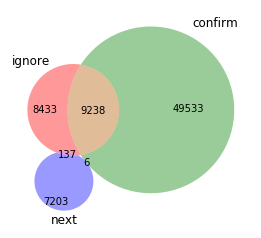

In [25]:
set0 = set(status[status['0'] > 0]['เลข ปปช'])
set1 = set(status[status['1'] > 0]['เลข ปปช'])
setX = set(status[status['X'] > 0]['เลข ปปช'])

venn3([set0, set1, setX], ('ignore', 'confirm', 'next'))
plt.show()

### Q: โดยเฉลี่ยแล้วคนนึงติดกี่ที่?

In [26]:
status['sum'].describe().to_frame()

sum
count  74935.000000
mean   1.160059    
std    0.420411    
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    1.000000    
max    6.000000

In [27]:
status.groupby('sum')['เลข ปปช'].count().to_frame()

เลข ปปช
sum         
1.0  64366  
2.0  9290   
3.0  1145   
4.0  124    
5.0  8      
6.0  2

### Q: โดยเฉลี่ยแล้วคนนึงสละสิทธิ์กี่ที่?

In [28]:
status['drop'].describe().to_frame()

drop
count  74935.000000
mean   0.369841    
std    0.559105    
min    0.000000    
25%    0.000000    
50%    0.000000    
75%    1.000000    
max    5.000000

In [29]:
status.groupby('drop')['เลข ปปช'].count().to_frame()

เลข ปปช
drop         
0.0   49918  
1.0   22580  
2.0   2198   
3.0   220    
4.0   17     
5.0   2

### Q: คณะไหนมีคนสละสิทธิ์มากที่สุด

In [30]:
dept_dir = main_df.drop_duplicates('รหัสคณะ')[['รหัสคณะ','ชื่อคณะ/สาขา','มหาวิทยาลัย']]
dept_status = main_df.groupby('รหัสคณะ')['สถานะ'].value_counts().unstack().fillna(0)
dept_status['seat'] = dept_status.sum(axis=1)
dept_status['drop'] = dept_status[['0', 'X']].sum(axis=1)
dept_status["drop ratio"] = dept_status["drop"]/dept_status["seat"]
dept_status = dept_status.reset_index()
dept_status.head()

สถานะ      รหัสคณะ    0     1    C    X  seat  drop  drop ratio
0      00021040102  1.0  28.0  0.0  3.0  32.0  4.0   0.125000  
1      00021050102  6.0  20.0  0.0  5.0  31.0  11.0  0.354839  
2      00121000102  0.0  3.0   0.0  0.0  3.0   0.0   0.000000  
3      00121010102  0.0  22.0  0.0  0.0  22.0  0.0   0.000000  
4      00121020102  5.0  28.0  0.0  3.0  36.0  8.0   0.222222

In [31]:
dept_status[['1', 'drop', 'seat', 'drop ratio', 'รหัสคณะ']].merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).rename(index=str, columns={'1': 'accept'})

accept   drop    seat  drop ratio      รหัสคณะ  \
2137  683.0   457.0  1140.0  0.400877    02112010101   
2125  312.0   292.0  604.0   0.483444    02110010101   
2199  444.0   270.0  714.0   0.378151    02120010101   
1769  347.0   255.0  602.0   0.423588    01707010034   
2086  298.0   226.0  524.0   0.431298    02105010101   
2087  82.0    144.0  226.0   0.637168    02105020201   
2080  64.0    122.0  186.0   0.655914    02104010101   
2152  194.0   121.0  315.0   0.384127    02113020201   
1777  85.0    119.0  204.0   0.583333    01710010005   
2178  241.0   111.0  352.0   0.315341    02115020201   
2151  200.0   108.0  308.0   0.350649    02113010101   
3835  48.0    104.0  152.0   0.684211    16902090102   
2140  132.0   103.0  235.0   0.438298    02112030301   
3855  53.0    101.0  154.0   0.655844    16903050102   
2318  34.0    100.0  136.0   0.735294    02416010002   
2090  82.0    95.0   177.0   0.536723    02105050501   
2141  165.0   89.0   254.0   0.350394    02112040401   
2147  102.0   86.0   188.0   0.457447    02112070701   
1758  56.0    85.0   141.0   0.602837    01701110012   
3524  56.0    80.0   137.0   0.583942    162040005C2   
3062  24.0    80.0   104.0   0.769231    15204421411   
2328  49.0    77.0   126.0   0.611111    02419010002   
3269  52.0    76.0   129.0   0.589147    15630000201   
3030  21.0    74.0   95.0    0.778947    15201221211   
2101  49.0    71.0   120.0   0.591667    02106050501   
504   79.0    68.0   147.0   0.462585    00304992601   
2075  53.0    67.0   120.0   0.558333    02101010101   
3963  59.0    67.0   131.0   0.511450    17111030921   
3040  20.0    67.0   87.0    0.770115    15201322611   
3959  95.0    66.0   174.0   0.379310    17111030333   
4467  31.0    65.0   96.0    0.677083    19111000083   
2088  43.0    64.0   107.0   0.598131    02105030301   
3953  170.0   63.0   239.0   0.263598    17111030302   
3952  80.0    63.0   149.0   0.422819    17111030301   
3518  44.0    62.0   108.0   0.574074    162030010C2   
2091  25.0    61.0   86.0    0.709302    02105060601   
3965  108.0   59.0   177.0   0.333333    17111040441   
3064  51.0    59.0   110.0   0.536364    15204521111   
3514  64.0    59.0   125.0   0.472000    162030005C2   
2323  10.0    58.0   68.0    0.852941    02418040002   
3846  30.0    56.0   86.0    0.651163    16903041002   
3991  57.0    54.0   120.0   0.450000    17111090502   
3519  30.0    53.0   84.0    0.630952    162030011C2   
3245  37.0    52.0   90.0    0.577778    15610003301   
3853  31.0    52.0   83.0    0.626506    16903042802   
3988  43.0    52.0   105.0   0.495238    17111070602   
3060  18.0    52.0   70.0    0.742857    15204421211   
2244  20.0    51.0   71.0    0.718310    02200500503   
3291  29.0    51.0   80.0    0.637500    15640002001   
3075  26.0    50.0   76.0    0.657895    15206223411   
2319  17.0    50.0   67.0    0.746269    02417010002   
1759  1.0     50.0   51.0    0.980392    01701110013   
2305  24.0    50.0   74.0    0.675676    02412050002   
3049  31.0    49.0   80.0    0.612500    15203321111   
2154  25.0    48.0   73.0    0.657534    02114010101   
2078  50.0    48.0   98.0    0.489796    02102010101   
3829  35.0    48.0   83.0    0.578313    16902030202   
3856  17.0    47.0   64.0    0.734375    16904022002   
2085  54.0    46.0   100.0   0.460000    02104040401   
3503  11.0    46.0   58.0    0.793103    162020005C2   
3949  23.0    45.0   72.0    0.625000    17111010268   
2298  35.0    45.0   80.0    0.562500    02410060002   
3845  43.0    45.0   88.0    0.511364    16903040902   
2150  60.0    45.0   105.0   0.428571    02112101001   
3248  8.0     44.0   54.0    0.814815    15620000201   
3528  27.0    44.0   73.0    0.602740    162040009C2   
2146  20.0    44.0   64.0    0.687500    02112060601   
1967  147.0   44.0   191.0   0.230366    02012001200   
3499  35.0    44.0   80.0    0.550000    162020001C2   
2256  166.0   44.0   210.0   0.209524    02200800801   
895   112.0   44.0   156.0   0

### Q: คนติดคณะไหนที่สละสิทธิ์มากที่สุด

In [32]:
confirm = main_df[main_df['สถานะ'] == '1'].drop_duplicates('เลข ปปช')[['เลข ปปช', 'รหัสคณะ']]
drop_cont = status.merge(confirm, on='เลข ปปช').groupby('รหัสคณะ')[['sum','drop']].sum()
tmp = drop_cont.reset_index().merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).merge(dept_status[['รหัสคณะ', 'seat', '1', 'drop']], on='รหัสคณะ').rename(index=str, columns={'1': 'accept', 'sum': 'seat_aquire', 'drop_x': 'seat_drop', 'drop_y': 'drop'})
tmp['aquire_ratio'] = tmp['seat_aquire']/tmp['accept']
tmp['drop_ratio'] = tmp['seat_drop']/tmp['accept']
tmp

รหัสคณะ  seat_aquire  seat_drop  \
0     01707010034  534.0        187.0       
1     02112010101  863.0        180.0       
2     02120010101  549.0        105.0       
3     17111030302  243.0        73.0        
4     02105010101  370.0        72.0        
5     02110010101  373.0        61.0        
6     02115020201  301.0        60.0        
7     01701110012  106.0        50.0        
8     17118020148  102.0        47.0        
9     17111040441  152.0        44.0        
10    17118020107  104.0        40.0        
11    01710010005  124.0        39.0        
12    00306000501  114.0        37.0        
13    01706090018  77.0         35.0        
14    17111030333  130.0        35.0        
15    02025001200  169.0        35.0        
16    02113020201  228.0        34.0        
17    02113010101  234.0        34.0        
18    02112040401  198.0        33.0        
19    00420501100  126.0        33.0        
20    17118020110  87.0         33.0        
21    01812212101  115.0        32.0        
22    16901010102  88.0         31.0        
23    17111030301  110.0        30.0        
24    02101010101  83.0         30.0        
25    01708070015  64.0         30.0        
26    02200800801  195.0        29.0        
27    17111010249  91.0         29.0        
28    00332020201  94.0         29.0        
29    00320010301  73.0         29.0        
30    00307050970  70.0         28.0        
31    00321080901  93.0         28.0        
32    02616000102  148.0        28.0        
33    02105050501  109.0        27.0        
34    00307010301  86.0         27.0        
35    00422091201  98.0         27.0        
36    02014001200  125.0        27.0        
37    17118020145  66.0         26.0        
38    00305303728  80.0         26.0        
39    00321151101  73.0         25.0        
40    01706090019  53.0         25.0        
41    1581as8101n  68.0         25.0        
42    00420502100  93.0         25.0        
43    17111090502  81.0         24.0        
44    00321080701  83.0         24.0        
45    15630000201  76.0         24.0        
46    162010001C2  42.0         23.0        
47    21602000101  185.0        23.0        
48    16901011002  81.0         23.0        
49    02112030301  154.0        22.0        
50    02013004200  84.0         22.0        
51    01812191901  105.0        22.0        
52    16302225802  72.0         21.0        
53    02116020201  79.0         21.0        
54    02012001200  168.0        21.0        
55    00321080801  80.0         21.0        
56    02105020201  103.0        21.0        
57    14800A18017  56.0         21.0        
58    00605010101  121.0        20.0        
59    17361906612  99.0         20.0        
60    00421801201  88.0         20.0        
61    02013001200  137.0        20.0        
62    00307050770  41.0         20.0        
63    17118020174  67.0         20.0        
64    02013003200  119.0        20.0        
65    02112070701  122.0        20.0        
66    17111030921  79.0         20.0        
67    01407031013  48.0         20.0        
68    02104020201  84.0         20.0        
69    14800A18005  46.0         19.0        
70    02104040401  73.0         19.0        
71    02104010102  71.0         19.0        
72    15311000002  46.0         19.0        
73    17111070602  62.0         19.0        
74    17111050201  64.0         19.0        
75    00302066301  58.0         19.0        
76    00420605105  102.0        19.0        
77    00302126001  54.0         19.0        
78    00805000002  186.0        19.0        
79    00305293528  90.0         19.0        
80    02606000502  46.0         19.0        
81    16302048802  67.0         18.0        
82    02103010101  103.0        18.0        
83    00617020101  57.0         18.0        
84    00501013010  57.0         18.0        
85    00304992601  97.0         18.0        
86    00421201101  86.0         18.0        
87    00303991601  44.0         18.0        
88   

## รอบ 3-1

In [33]:
main_df = pass31_df
num_regis = 106495
output = "มีผู้สมัคร " + str(num_regis) + " คน" + "\n"
output += "มีผู้สอบติด " + str(len(main_df['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(main_df)) + "\n"
deny_or_ignore = main_df[main_df['สถานะ'] == '1']
confirm = main_df[main_df['สถานะ'] == '1']
output += "มีผู้สละสิทธิ์ " + str(len(deny_or_ignore['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(deny_or_ignore)) + "\n"
output += "มีผู้ยืนยันสิทธิ์ " + str(len(confirm['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(confirm))
print(output)

มีผู้สมัคร 106495 คน
มีผู้สอบติด 69968 คน เป็นที่นั่งทั้งหมด 124517
มีผู้สละสิทธิ์ 51253 คน เป็นที่นั่งทั้งหมด 51254
มีผู้ยืนยันสิทธิ์ 51253 คน เป็นที่นั่งทั้งหมด 51254


### Q: จำนวนคนที่ confirm, deny, next เป็นยังไง?

In [34]:
status = main_df.groupby('เลข ปปช')['สถานะ'].value_counts().unstack().fillna(0)
status['sum'] = status.sum(axis=1)
status['drop'] = status[['0', 'D', 'X']].sum(axis=1)
status = status.reset_index()
status.head()

สถานะ        เลข ปปช    0    1    D    X  sum  drop
0      0050011153920  0.0  1.0  0.0  0.0  1.0  0.0 
1      0050031004814  0.0  1.0  0.0  0.0  1.0  0.0 
2      0050051139154  0.0  1.0  1.0  0.0  2.0  1.0 
3      0050241005116  0.0  1.0  0.0  0.0  1.0  0.0 
4      0050991077041  0.0  1.0  0.0  0.0  1.0  0.0

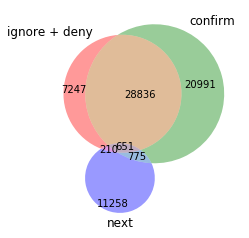

In [35]:
set0 = set(status[(status['0'] > 0) | (status['D'] > 0)]['เลข ปปช'])
set1 = set(status[status['1'] > 0]['เลข ปปช'])
setX = set(status[status['X'] > 0]['เลข ปปช'])

venn3([set0, set1, setX], ('ignore + deny', 'confirm', 'next'))
plt.show()

### Q: โดยเฉลี่ยแล้วคนนึงติดกี่ที่?

In [36]:
status['sum'].describe().to_frame()

sum
count  69968.000000
mean   1.779628    
std    0.897852    
min    1.000000    
25%    1.000000    
50%    2.000000    
75%    2.000000    
max    4.000000

In [37]:
status.groupby('sum')['เลข ปปช'].count().to_frame()

เลข ปปช
sum         
1.0  33641  
2.0  22074  
3.0  10284  
4.0  3969

### Q: โดยเฉลี่ยแล้วคนนึงสละสิทธิ์กี่ที่?

In [38]:
status['drop'].describe().to_frame()

drop
count  69968.000000
mean   1.047093    
std    0.902463    
min    0.000000    
25%    0.000000    
50%    1.000000    
75%    2.000000    
max    4.000000

In [39]:
status.groupby('drop')['เลข ปปช'].count().to_frame()

เลข ปปช
drop         
0.0   20991  
1.0   30232  
2.0   13594  
3.0   4761   
4.0   390

### Q: คณะไหนมีคนสละสิทธิ์มากที่สุด

In [40]:
dept_dir = main_df.drop_duplicates('รหัสคณะ')[['รหัสคณะ','ชื่อคณะ/สาขา','มหาวิทยาลัย']]
dept_status = main_df.groupby('รหัสคณะ')['สถานะ'].value_counts().unstack().fillna(0)
dept_status['seat'] = dept_status.sum(axis=1)
dept_status['drop'] = dept_status[['0', 'D', 'X']].sum(axis=1)
dept_status["drop ratio"] = dept_status["drop"]/dept_status["seat"]
dept_status = dept_status.reset_index()
dept_status.head()

สถานะ      รหัสคณะ    0      1      D     X   seat   drop  drop ratio
0      00121000003  2.0  269.0  330.0  9.0   610.0  341.0  0.559016  
1      00121040003  0.0  1.0    9.0    0.0   10.0   9.0    0.900000  
2      00121060003  3.0  7.0    15.0   5.0   30.0   23.0   0.766667  
3      00121070003  5.0  14.0   28.0   14.0  61.0   47.0   0.770492  
4      00121080003  1.0  8.0    17.0   4.0   30.0   22.0   0.733333

In [41]:
dept_status[['1', 'drop', 'seat', 'drop ratio', 'รหัสคณะ']].merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).rename(index=str, columns={'1': 'accept'})

accept   drop    seat  drop ratio      รหัสคณะ  \
1241  607.0   450.0  1057.0  0.425733    01707010034   
729   272.0   351.0  623.0   0.563403    00807010000   
0     269.0   341.0  610.0   0.559016    00121000003   
1620  175.0   298.0  473.0   0.630021    02416010003   
1475  284.0   293.0  577.0   0.507799    02110010101   
474   184.0   287.0  471.0   0.609342    00430599200   
2618  239.0   285.0  524.0   0.543893    16604344903   
844   255.0   277.0  532.0   0.520677    01090310200   
556   102.0   277.0  379.0   0.730871    00502012010   
2609  208.0   269.0  477.0   0.563941    16603830203   
1479  219.0   268.0  487.0   0.550308    02114010101   
2771  522.0   264.0  786.0   0.335878    17111100902   
2616  198.0   258.0  456.0   0.565789    16604342303   
725   160.0   257.0  417.0   0.616307    00805021620   
668   102.0   248.0  350.0   0.708571    00605010101   
2603  123.0   247.0  370.0   0.667568    16603731303   
2600  182.0   241.0  423.0   0.569740    16603332903   
565   223.0   233.0  456.0   0.510965    00504012010   
1503  161.0   232.0  393.0   0.590331    02115020201   
724   113.0   229.0  342.0   0.669591    00805011620   
1502  108.0   228.0  336.0   0.678571    02115010101   
558   235.0   221.0  456.0   0.484649    00502022010   
285   259.0   217.0  476.0   0.455882    00226221981   
1551  148.0   210.0  358.0   0.586592    02200800801   
731   17.0    193.0  210.0   0.919048    00808000000   
559   89.0    193.0  282.0   0.684397    00502031010   
2645  89.0    192.0  281.0   0.683274    16608732103   
1699  95.0    191.0  286.0   0.667832    02703010021   
2092  96.0    185.0  281.0   0.658363    14800G12232   
1162  69.0    172.0  241.0   0.713693    01501710118   
715   185.0   168.0  353.0   0.475921    00803000600   
2612  104.0   166.0  270.0   0.614815    16604340203   
58    24.0    166.0  190.0   0.873684    00126002003   
2617  112.0   162.0  274.0   0.591241    16604344003   
726   75.0    156.0  231.0   0.675325    00805031620   
3000  86.0    153.0  239.0   0.640167    19105000035   
2579  95.0    151.0  246.0   0.613821    16601111203   
2075  79.0    149.0  228.0   0.653509    14800C12013   
2580  90.0    149.0  239.0   0.623431    16601111303   
2576  130.0   146.0  276.0   0.528986    16601110903   
2577  111.0   145.0  256.0   0.566406    16601111003   
1949  102.0   145.0  247.0   0.587045    14205000630   
205   38.0    142.0  180.0   0.788889    00226091061   
126   160.0   140.0  300.0   0.466667    00226030141   
2613  155.0   140.0  295.0   0.474576    16604340303   
1593  119.0   138.0  257.0   0.536965    02410060003   
60    29.0    137.0  166.0   0.825301    00126012003   
2578  111.0   137.0  248.0   0.552419    16601111103   
147   65.0    135.0  200.0   0.675000    00226050351   
755   94.0    135.0  229.0   0.589520    00813050200   
1603  86.0    134.0  220.0   0.609091    02412050003   
2599  64.0    132.0  196.0   0.673469    16603332803   
3179  100.0   131.0  231.0   0.567100    19408010103   
2234  91.0    129.0  220.0   0.586364    15311000007   
1582  148.0   129.0  277.0   0.465704    02335350101   
673   12.0    128.0  140.0   0.914286    00606010101   
3037  75.0    128.0  203.0   0.630542    19200151020   
665   122.0   125.0  247.0   0.506073    00602020101   
2554  38.0    125.0  163.0   0.766871    16500114483   
2615  107.0   125.0  232.0   0.538793    16604340503   
2552  39.0    124.0  163.0   0.760736    16500114463   
1004  68.0    123.0  191.0   0.643979    01300000016   
1163  56.0    122.0  178.0   0.685393    01501710218   
3069  95.0    121.0  216.0   0.560185    19200555130   
680   200.0   119.0  319.0   0.373041    00611000101   
1003  76.0    119.0  195.0   0.610256    01300000015   
2575  86.0    118.0  204.0   0.578431    16601110803   
2076  84.0    117.0  201.0   0.582090    14800C12014   
366   192.0   115.0  307.0   0.374593    00304993231   
2622  68.0    114.0  182.0   0.626374    16604346403   
632   145.0   113.0  258.0   0

### Q: คนติดคณะไหนที่สละสิทธิ์มากที่สุด

In [42]:
confirm = main_df[main_df['สถานะ'] == '1'].drop_duplicates('เลข ปปช')[['เลข ปปช', 'รหัสคณะ']]
drop_cont = status.merge(confirm, on='เลข ปปช').groupby('รหัสคณะ')[['sum','drop']].sum()
tmp = drop_cont.reset_index().merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).merge(dept_status[['รหัสคณะ', 'seat', '1', 'drop']], on='รหัสคณะ').rename(index=str, columns={'1': 'accept', 'sum': 'seat_aquire', 'drop_x': 'seat_drop', 'drop_y': 'drop'})
tmp['aquire_ratio'] = tmp['seat_aquire']/tmp['accept']
tmp['drop_ratio'] = tmp['seat_drop']/tmp['accept']
tmp

รหัสคณะ  seat_aquire  seat_drop  \
0     01707010034  1111.0       504.0       
1     00121000003  754.0        485.0       
2     17111100902  877.0        355.0       
3     03100000009  551.0        285.0       
4     00304993231  442.0        250.0       
5     02110010101  530.0        246.0       
6     01090310200  491.0        236.0       
7     16604344903  458.0        219.0       
8     02114010101  437.0        218.0       
9     16604342303  405.0        207.0       
10    16603332903  374.0        192.0       
11    16603830203  393.0        185.0       
12    03100000002  378.0        184.0       
13    02115020201  342.0        181.0       
14    00226221981  428.0        169.0       
15    00430599200  353.0        169.0       
16    00501012010  377.0        161.0       
17    00611000101  356.0        156.0       
18    00502022010  389.0        154.0       
19    03100000012  326.0        153.0       
20    14800G12232  245.0        149.0       
21    00807010000  420.0        148.0       
22    03100000007  292.0        146.0       
23    17111030302  235.0        141.0       
24    00505012010  310.0        135.0       
25    03100000030  256.0        132.0       
26    16603731303  253.0        130.0       
27    00126012203  214.0        129.0       
28    00226030141  287.0        127.0       
29    16601110903  256.0        126.0       
30    00502012010  226.0        124.0       
31    00502031010  213.0        124.0       
32    00504012010  346.0        123.0       
33    03100000040  213.0        123.0       
34    02115010101  230.0        122.0       
35    14205000630  220.0        118.0       
36    14800C12014  202.0        118.0       
37    02416010003  288.0        113.0       
38    15311000007  197.0        106.0       
39    03100000021  192.0        106.0       
40    16601111003  214.0        103.0       
41    16556049903  257.0        103.0       
42    02335350101  251.0        103.0       
43    00602020101  225.0        103.0       
44    17111030301  180.0        101.0       
45    02200800801  248.0        100.0       
46    00430605105  156.0        100.0       
47    00805021620  259.0        99.0        
48    19408010103  197.0        97.0        
49    00516012020  242.0        97.0        
50    01605000045  245.0        95.0        
51    16604344003  206.0        94.0        
52    00226020081  180.0        94.0        
53    16601111103  204.0        93.0        
54    00503041020  181.0        93.0        
55    02410060003  212.0        93.0        
56    16604340503  198.0        91.0        
57    03100000038  184.0        91.0        
58    14800C12013  170.0        91.0        
59    00226050352  177.0        91.0        
60    19200151020  166.0        91.0        
61    03100000041  157.0        91.0        
62    03100000039  173.0        91.0        
63    00803000600  275.0        90.0        
64    16604340203  194.0        90.0        
65    00605010101  190.0        88.0        
66    00807020000  188.0        86.0        
67    00502021020  161.0        85.0        
68    03100000014  157.0        85.0        
69    00805011620  196.0        83.0        
70    00122000403  135.0        82.0        
71    03100000022  161.0        82.0        
72    03100000005  148.0        81.0        
73    02109060601  159.0        81.0        
74    00226151441  177.0        80.0        
75    17111030333  150.0        80.0        
76    00524041020  190.0        80.0        
77    00226050342  149.0        79.0        
78    19200555130  174.0        79.0        
79    16500114453  149.0        78.0        
80    14800E12739  136.0        78.0        
81    16608732103  166.0        77.0        
82    00508022020  179.0        77.0        
83    16608733903  136.0        77.0        
84    01090310101  157.0        77.0        
85    21801010101  165.0        76.0        
86    03100000004  148.0        76.0        
87    16556107213  144.0        76.0        
88   

## รอบ 3-2

In [43]:
main_df = pass32_df
num_regis = 54869
output = "มีผู้สมัคร " + str(num_regis) + " คน" + "\n"
output += "มีผู้สอบติด " + str(len(main_df['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(main_df)) + "\n"
deny_or_ignore = main_df[main_df['สถานะ'] != '1']
confirm = main_df[main_df['สถานะ'] == '1']
output += "มีผู้สละสิทธิ์ " + str(len(deny_or_ignore['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(deny_or_ignore)) + "\n"
output += "มีผู้ยืนยันสิทธิ์ " + str(len(confirm['เลข ปปช'].unique())) + " คน เป็นที่นั่งทั้งหมด " + str(len(confirm))
print(output)

มีผู้สมัคร 54869 คน
มีผู้สอบติด 10586 คน เป็นที่นั่งทั้งหมด 13029
มีผู้สละสิทธิ์ 5658 คน เป็นที่นั่งทั้งหมด 6504
มีผู้ยืนยันสิทธิ์ 6525 คน เป็นที่นั่งทั้งหมด 6525


### Q: จำนวนคนที่ confirm, deny, next เป็นยังไง?

In [44]:
status = main_df.groupby('เลข ปปช')['สถานะ'].value_counts().unstack().fillna(0)
status['sum'] = status.sum(axis=1)
status['drop'] = status[['0', 'D', 'X']].sum(axis=1)
status = status.reset_index()
status.head()

สถานะ       เลข ปปช    0    1    C    D    X  sum  drop
0      308855887     2.0  0.0  0.0  0.0  0.0  2.0  2.0 
1      310156593     0.0  1.0  0.0  0.0  0.0  1.0  0.0 
2      50031004814   2.0  0.0  0.0  0.0  0.0  2.0  2.0 
3      570189039138  1.0  0.0  0.0  0.0  0.0  1.0  1.0 
4      860289000010  1.0  0.0  0.0  0.0  0.0  1.0  1.0

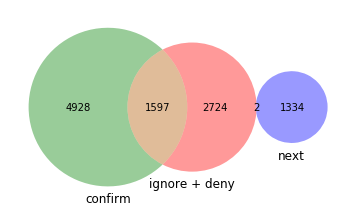

In [45]:
set0 = set(status[(status['0'] > 0) | (status['D'] > 0)]['เลข ปปช'])
set1 = set(status[status['1'] > 0]['เลข ปปช'])
setX = set(status[status['X'] > 0]['เลข ปปช'])

venn3([set0, set1, setX], ('ignore + deny', 'confirm', 'next'))
plt.show()

### Q: โดยเฉลี่ยแล้วคนนึงติดกี่ที่?

In [46]:
status['sum'].describe().to_frame()

sum
count  10586.000000
mean   1.230776    
std    0.520275    
min    1.000000    
25%    1.000000    
50%    1.000000    
75%    1.000000    
max    4.000000

In [47]:
status.groupby('sum')['เลข ปปช'].count().to_frame()

เลข ปปช
sum         
1.0  8596   
2.0  1577   
3.0  373    
4.0  40

### Q: โดยเฉลี่ยแล้วคนนึงสละสิทธิ์กี่ที่?

In [48]:
status['drop'].describe().to_frame()

drop
count  10586.000000
mean   0.614302    
std    0.641959    
min    0.000000    
25%    0.000000    
50%    1.000000    
75%    1.000000    
max    3.000000

In [49]:
status.groupby('drop')['เลข ปปช'].count().to_frame()

เลข ปปช
drop         
0.0   4929   
1.0   4892   
2.0   684    
3.0   81

### Q: คณะไหนมีคนสละสิทธิ์มากที่สุด

In [50]:
dept_dir = main_df.drop_duplicates('รหัสคณะ')[['รหัสคณะ','ชื่อคณะ/สาขา','มหาวิทยาลัย']]
dept_status = main_df.groupby('รหัสคณะ')['สถานะ'].value_counts().unstack().fillna(0)
dept_status['seat'] = dept_status.sum(axis=1)
dept_status['drop'] = dept_status[['0', 'D', 'X']].sum(axis=1)
dept_status["drop ratio"] = dept_status["drop"]/dept_status["seat"]
dept_status = dept_status.reset_index()
dept_status.head()

สถานะ    รหัสคณะ     0      1    C     D     X   seat  drop  drop ratio
0      121000003  22.0  260.0  0.0  44.0  15.0  341.0  81.0  0.237537  
1      121040003  0.0   2.0    0.0  7.0   0.0   9.0    7.0   0.777778  
2      121060003  2.0   6.0    0.0  2.0   2.0   12.0   6.0   0.500000  
3      121070003  2.0   10.0   0.0  20.0  2.0   34.0   24.0  0.705882  
4      121080003  3.0   9.0    0.0  6.0   4.0   22.0   13.0  0.590909

In [51]:
dept_status[['1', 'drop', 'seat', 'drop ratio', 'รหัสคณะ']].merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).rename(index=str, columns={'1': 'accept'})

accept   drop   seat  drop ratio      รหัสคณะ  \
58   92.0    130.0  222.0  0.585586    126002003     
86   24.0    96.0   120.0  0.800000    129000003     
248  196.0   84.0   280.0  0.300000    430599200     
0    260.0   81.0   341.0  0.237537    121000003     
60   108.0   71.0   179.0  0.396648    126012003     
558  43.0    64.0   107.0  0.598131    1921240301    
87   43.0    63.0   106.0  0.594340    134000103     
697  14.0    56.0   70.0   0.800000    3100000049    
323  75.0    50.0   125.0  0.400000    602020101     
485  11.0    49.0   60.0   0.816667    1601000002    
325  45.0    46.0   91.0   0.505495    605010101     
216  10.0    46.0   56.0   0.821429    315010631     
662  59.0    45.0   104.0  0.432692    2200800801    
154  30.0    44.0   74.0   0.594595    226121381     
559  68.0    43.0   111.0  0.387387    1921240501    
330  29.0    41.0   70.0   0.585714    606010101     
521  24.0    40.0   64.0   0.625000    1902240201    
18   7.0     40.0   47.0   0.851064    123030003     
518  31.0    37.0   68.0   0.544118    1901240111    
63   21.0    36.0   57.0   0.631579    126032603     
279  24.0    35.0   59.0   0.593220    502012010     
819  12.0    35.0   47.0   0.744681    19934220120   
654  26.0    34.0   60.0   0.566667    2200300313    
492  45.0    32.0   77.0   0.415584    1601000009    
778  1.0     32.0   33.0   0.969697    17361506512   
354  14.0    32.0   46.0   0.695652    903011007     
479  11.0    32.0   43.0   0.744186    1501410218    
808  12.0    31.0   43.0   0.720930    19915320220   
289  35.0    31.0   66.0   0.469697    506072010     
788  11.0    30.0   41.0   0.731707    17402005303   
339  15.0    30.0   45.0   0.666667    808000000     
313  10.0    30.0   40.0   0.750000    514012010     
576  18.0    30.0   48.0   0.625000    2012001301    
5    29.0    28.0   57.0   0.491228    121100003     
511  92.0    28.0   120.0  0.233333    1610000064    
419  7.0     28.0   35.0   0.800000    1407051009    
520  12.0    28.0   40.0   0.700000    1902240101    
262  21.0    27.0   48.0   0.562500    431201101     
488  4.0     27.0   31.0   0.870968    1601000005    
62   25.0    27.0   52.0   0.519231    126032503     
343  43.0    27.0   70.0   0.385714    813050200     
529  23.0    27.0   50.0   0.540000    1902241101    
153  10.0    27.0   37.0   0.729730    226121371     
59   45.0    26.0   71.0   0.366197    126002203     
517  15.0    26.0   41.0   0.634146    1710010005    
535  32.0    26.0   58.0   0.448276    1903240211    
594  14.0    26.0   40.0   0.650000    2018003301    
642  21.0    26.0   47.0   0.553191    2109060601    
480  33.0    25.0   58.0   0.431034    1501410318    
32   7.0     25.0   32.0   0.781250    123170003     
510  35.0    25.0   60.0   0.416667    1610000062    
523  12.0    25.0   37.0   0.675676    1902240501    
809  7.0     24.0   31.0   0.774194    19915320320   
3    10.0    24.0   34.0   0.705882    121070003     
495  30.0    24.0   54.0   0.444444    1601000012    
138  25.0    23.0   48.0   0.479167    226091061     
283  42.0    23.0   65.0   0.353846    504012010     
507  34.0    23.0   57.0   0.403509    1604000039    
538  35.0    23.0   58.0   0.396552    1903241011    
821  56.0    23.0   79.0   0.291139    21801010101   
542  24.0    22.0   46.0   0.478261    1905240411    
659  11.0    22.0   33.0   0.666667    2200700703    
483  9.0     22.0   31.0   0.709677    1501710118    
818  4.0     21.0   25.0   0.840000    19934210120   
593  19.0    21.0   40.0   0.525000    2018002301    
644  14.0    21.0   35.0   0.600000    2200100101    
377  14.0    21.0   35.0   0.600000    967001007     
592  24.0    21.0   45.0   0.466667    2018001301    
151  11.0    20.0   31.0   0.645161    226121341     
420  6.0     20.0   26.0   0.769231    1407061003    
379  51.0    19.0   70.0   0.271429    1090310101    
775  0.0     19.0   19.0   1.000000    17361101412   
530  31.0    19.0   50.0   0.380000    1902241102    
104  37.0

### Q: คนติดคณะไหนที่สละสิทธิ์มากที่สุด

In [52]:
confirm = main_df[main_df['สถานะ'] == '1'].drop_duplicates('เลข ปปช')[['เลข ปปช', 'รหัสคณะ']]
drop_cont = status.merge(confirm, on='เลข ปปช').groupby('รหัสคณะ')[['sum','drop']].sum()
tmp = drop_cont.reset_index().merge(dept_dir, on='รหัสคณะ').sort_values('drop', ascending=False).merge(dept_status[['รหัสคณะ', 'seat', '1', 'drop']], on='รหัสคณะ').rename(index=str, columns={'1': 'accept', 'sum': 'seat_aquire', 'drop_x': 'seat_drop', 'drop_y': 'drop'})
tmp['aquire_ratio'] = tmp['seat_aquire']/tmp['accept']
tmp['drop_ratio'] = tmp['seat_drop']/tmp['accept']
tmp

รหัสคณะ  seat_aquire  seat_drop  \
0    121000003    455.0        195.0       
1    126012003    231.0        123.0       
2    126002003    141.0        49.0        
3    430599200    243.0        47.0        
4    121100003    70.0         41.0        
5    134000103    78.0         35.0        
6    126012203    61.0         33.0        
7    126032603    47.0         26.0        
8    126002203    70.0         25.0        
9    125010003    41.0         25.0        
10   129000003    47.0         23.0        
11   430110110    50.0         22.0        
12   226091061    45.0         20.0        
13   126032503    45.0         20.0        
14   602020101    94.0         19.0        
15   502012010    42.0         18.0        
16   122000403    31.0         15.0        
17   1902240201   39.0         15.0        
18   1921240501   82.0         14.0        
19   134000203    27.0         14.0        
20   124020203    23.0         13.0        
21   226050381    24.0         12.0        
22   3100000041   31.0         12.0        
23   606010101    41.0         12.0        
24   431590200    25.0         12.0        
25   430601101    25.0         11.0        
26   122000203    25.0         11.0        
27   430605105    28.0         11.0        
28   1905240211   35.0         11.0        
29   1601000003   33.0         10.0        
30   430403203    24.0         10.0        
31   1601000009   55.0         10.0        
32   502031010    19.0         10.0        
33   123090003    20.0         9.0         
34   430192115    29.0         9.0         
35   2200800801   68.0         9.0         
36   128000403    22.0         9.0         
37   430604104    23.0         9.0         
38   123140003    23.0         9.0         
39   431201101    30.0         9.0         
40   1610000064   100.0        8.0         
41   122000503    18.0         8.0         
42   903006007    38.0         8.0         
43   125040003    23.0         8.0         
44   1902240101   20.0         8.0         
45   1601000006   16.0         8.0         
46   315010631    18.0         8.0         
47   430106112    20.0         8.0         
48   605010101    53.0         8.0         
49   2010006301   16.0         7.0         
50   2018003301   21.0         7.0         
51   1601000002   18.0         7.0         
52   903114007    36.0         7.0         
53   126032703    16.0         7.0         
54   127210003    22.0         7.0         
55   2019001301   18.0         7.0         
56   1902241401   16.0         7.0         
57   509152010    32.0         7.0         
58   21801010101  63.0         7.0         
59   122000703    18.0         7.0         
60   121070003    17.0         7.0         
61   121080003    15.0         6.0         
62   121060003    12.0         6.0         
63   802000100    19.0         6.0         
64   125020003    15.0         6.0         
65   1901240111   37.0         6.0         
66   1921240301   49.0         6.0         
67   123130003    11.0         6.0         
68   808000000    21.0         6.0         
69   127221103    14.0         6.0         
70   3100000015   12.0         6.0         
71   1501410318   39.0         6.0         
72   124030203    12.0         5.0         
73   506072010    40.0         5.0         
74   1407051009   12.0         5.0         
75   1500410218   30.0         5.0         
76   509052010    30.0         5.0         
77   226020081    42.0         5.0         
78   226121341    16.0         5.0         
79   3100000010   8.0          5.0         
80   430108108    34.0         5.0         
81   2200100101   19.0         5.0         
82   1601000008   25.0         5.0         
83   123010003    10.0         5.0         
84   813050200    48.0         5.0         
85   123020003    16.0         5.0         
86   1604000039   39.0         5.0         
87   302029231    17.0         5.0         
88   2018006301   23.0         5.0         
89   128000203    13.0         5.0         
90   